# CHƯƠNG 3 - PHẦN 04: ĐÁNH GIÁ ĐỘ CHÍNH XÁC CỦA CÁC MÔ HÌNH HỌC MÁY
---
Khi xây dựng một mô hình học máy, chúng ta cần một phép đánh giá để xem mô hình sử dụng có hiệu quả không và để so sánh độ chính xác của các mô hình học máy khác nhau cho bài toán cần giải quyết.
<img src='pic/overview.png' width='400px'>

Hiệu năng của một mô hình thường được đánh giá dựa trên tập dữ liệu kiểm thử (Test Data)

<img src='pic/train_test.png' width='300px'>

**Khái niệm liên quan:**
* **y_predict**: Kết quả dự đoán của mô hình học máy với tập dữ liệu kiểm thử (Test Data)
* **y_groundtruth**: Nhãn đầu ra thật (target) của tập dữ liệu kiểm thử (Test Data)

<img src='pic/groundtruth.png' width='400px'>


## A| Đánh giá mô hình phân lớp
---

<img src='pic/classification.jpg' width='500px'>

In [1]:
import numpy as np
#khởi tạo biến ngẫu nhiên cho bài toán phân lớp
#Dự đoán bệnh nhân có bị bệnh tim mạch hay không?
# 0: No - Không bị
# 1: Yes - Bị bệnh
# Tập dữ liệu TEST bao gồm 500 mẫu
#y_predict: Kết quả do mô hình dự đoán 
y_predict = np.random.randint(0,2,500)

#y_groundtruth: Nhãn thật của 500 mẫu trong tập dữ liệu Test
y_groundtruth = np.random.randint(0,2,500)

In [2]:
y_groundtruth.shape

(500,)

In [3]:
result_classification = np.concatenate((y_predict.reshape(-1,1),y_groundtruth.reshape(-1,1)),axis=1)
result_classification.shape

(500, 2)

In [6]:
import pandas as pd
df_class =pd.DataFrame(result_classification,columns=['y_predict','y_groundtruth'] )
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   y_predict      500 non-null    int32
 1   y_groundtruth  500 non-null    int32
dtypes: int32(2)
memory usage: 4.0 KB


In [7]:
#Đọc dữ liệu mẫu
import pandas as pd
df_classification = pd.read_csv('result_classification.csv')
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   y_predict      500 non-null    int64
 1   y_groundtruth  500 non-null    int64
dtypes: int64(2)
memory usage: 7.9 KB


In [8]:
df_classification.head(10)

,y_predict,y_groundtruth
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
5,1,0
6,0,0
7,1,1
8,1,1
9,1,0


In [9]:
df_classification['y_groundtruth'].value_counts()

0    341
1    159
Name: y_groundtruth, dtype: int64

In [10]:
#Dự đoán bệnh nhân có bị bệnh tim mạch hay không?
# 0: No - Không bị
# 1: Yes - Bị bệnh
# Tập dữ liệu TEST bao gồm 500 mẫu
#y_predict: Kết quả do mô hình dự đoán 
y_predict = df_classification['y_predict'].values

#y_groundtruth: Nhãn thật của 500 mẫu trong tập dữ liệu Test
y_groundtruth = df_classification['y_groundtruth'].values

In [11]:
y_predict

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

## 1) Accuracy (Độ chính xác):
---
Cách đơn giản và hay được sử dụng nhất là Accauracy: Tính tỷ lệ giữa số điểm được dự đoán đúng và tổng số điểm trong tập dữ liệu kiểm thử.

In [16]:
#Độ chính xác theo tỷ lệ số mẫu dự đoán đúng / tổng số mẫu của tập test
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_groundtruth,y_predict)
print('Độ chính xác của mô hình phân lớp:', acc)
print('Độ chính xác theo %:', round(acc*100,2))

Độ chính xác của mô hình phân lớp: 0.792
Độ chính xác theo %: 79.2


In [31]:
# Số liệu cho biết tổng số mẫu dự đoán đúng trên tập Test
acc2 = accuracy_score(y_groundtruth,y_predict,normalize=False)
print('Tổng số mẫu dự đoán đúng:', acc2)

Tổng số mẫu dự đoán đúng: 396


## 2) Confusion matrix
---
Cách tính sử dụng accuracy như ở trên chỉ cho chúng ta biết được bao nhiêu phần trăm lượng dữ liệu được phân loại đúng (hoặc tổng có bao nhiêu mẫu phân loại đúng) mà không chỉ ra được cụ thể mỗi loại được phân loại như thế nào, lớp nào được phân loại đúng nhiều nhất, và dữ liệu thuộc lớp nào thường bị phân loại nhầm vào lớp khác. Để có thể đánh giá được các giá trị này, chúng ta sử dụng một ma trận được gọi là confusion matrix.


In [17]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_groundtruth, y_predict)
print('Confusion matrix:')
print(cnf_matrix)

Confusion matrix:
[[288  53]
 [ 51 108]]


Ma trận thu được được gọi là confusion matrix. Nó là một ma trận vuông với kích thước mỗi chiều bằng số lượng lớp dữ liệu. Giá trị tại hàng thứ i, cột thứ j là số lượng điểm lẽ ra thuộc vào class i nhưng lại được dự đoán là thuộc vào class j. Như vậy, nhìn vào hàng thứ nhất (0), ta có thể thấy được rằng trong số bốn điểm thực sự thuộc lớp 0, chỉ có hai điểm được phân loại đúng, hai điểm còn lại bị phân loại nhầm vào lớp 1 và lớp 2.

Chúng ta có thể suy ra ngay rằng tổng các phần tử trong toàn ma trận này chính là số điểm trong tập kiểm thử. Các phần tử trên đường chéo của ma trận là số điểm được phân loại đúng của mỗi lớp dữ liệu. Từ đây có thể suy ra accuracy chính bằng tổng các phần tử trên đường chéo chia cho tổng các phần tử của toàn ma trận.

In [18]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Ground Truth label')
    plt.xlabel('Predicted label')

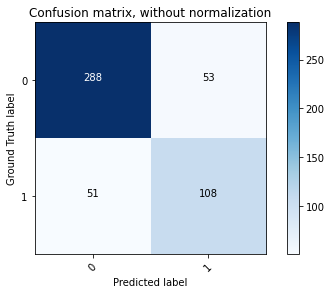

In [19]:
# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

Cách biểu diễn trên đây của confusion matrix còn được gọi là unnormalized confusion matrix, tức ma confusion matrix chưa chuẩn hoá. Để có cái nhìn rõ hơn, ta có thể dùng normalized confuion matrix, tức confusion matrix được chuẩn hoá. Để có normalized confusion matrix, ta lấy mỗi hàng của unnormalized confusion matrix sẽ được chia cho tổng các phần tử trên hàng đó. Như vậy, ta có nhận xét rằng tổng các phần tử trên một hàng của normalized confusion matrix luôn bằng 1. Điều này thường không đúng trên mỗi cột. Dưới đây là cách tính normalized confusion matrix:

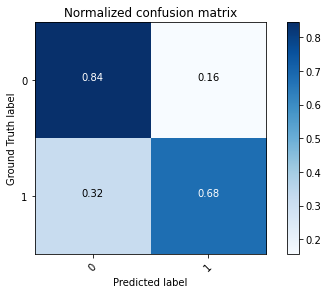

In [10]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

Với các bài toán với nhiều lớp dữ liệu, cách biểu diễn bằng màu này rất hữu ích. Các ô màu đậm thể hiện các giá trị cao. Một mô hình tốt sẽ cho một confusion matrix có các phần tử trên đường chéo chính có giá trị lớn, các phần tử còn lại có giá trị nhỏ. Nói cách khác, khi biểu diễn bằng màu sắc, đường chéo có màu càng đậm so với phần còn lại sẽ càng tốt. Từ hai hình trên ta thấy rằng confusion matrix đã chuẩn hoá mang nhiều thông tin hơn. Sự khác nhau được thấy ở ô trên cùng bên trái. Lớp dữ liệu 0 được phân loại không thực sự tốt nhưng trong unnormalized confusion matrix, nó vẫn có màu đậm như hai ô còn lại trên đường chéo chính.

## 3) Precision và Recall
---
* Precision được định nghĩa là tỷ lệ số điểm True positive trong số những điểm được phân loại là Positive (TP+FP) 
* Recall được định nghĩa tỷ lệ số điểm True Positive trong số những điểm thực sự là Positive (TP+FN)
<img src='pic/precision.png' width='500px'>

Để hiểu rõ hơn về hai chỉ số này, ta có thể tưởng tượng một ví dụ như sau. Khi một người nghĩ là mình đang mắc bệnh gì đó, họ thường đi đến bệnh viện để làm các xét nghiệm để bác sĩ chẩn đoán xem kết quả là dương tính hay là âm tính. Ta có hai trường hợp về tình trạng bệnh là mắc bệnh hoặc không mắc bệnh. Ta có hai trường hợp về kết quả chẩn đoán là dương tính và âm tính.

Khi đó, precision là tỉ lệ người được chẩn đoán là dương tính thật sự mắc bệnh trên tổng số người được chẩn đoán là dương tính. Nếu precision = 0.9, thì cứ 100 người được chẩn đoán là dương tính thì sẽ thật sự có 90 người mắc bệnh. Precision càng cao thì xác suất người được chẩn đoán là dương tính có khả năng mắc bệnh càng cao.

Recall là tỉ lệ người được chẩn đoán là dương tính thật sự mắc bệnh trên tổng số người thật sự mắc bệnh. Nếu recall = 0.9, thì cứ 100 người mắc bệnh thì sẽ chẩn đoán 90 người dương tính. Recall càng cao thì xác suất người mắc bệnh được chẩn đoán là dương tính càng cao.

In [23]:
#1) Chỉ số Precision:
from sklearn.metrics import precision_score

#Xác định chỉ số precison cho từng lớp:
precision = precision_score(y_groundtruth,
                            y_predict,                           
                            pos_label=0) #Xác định nhãn của lớp tính precision
print('Chỉ số Precision = ',precision)

Chỉ số Precision =  0.8495575221238938


In [27]:
from sklearn.metrics import precision_score

#Tính chỉ số precision cho tất cả các lớp
precision = precision_score(y_groundtruth,
                            y_predict, 
                            average=None)
print('Chỉ số Precision [0,1] = ',precision)

Chỉ số Precision [0,1] =  [0.84955752 0.67080745]


In [29]:
#2) Chỉ số Recall:
from sklearn.metrics import recall_score

#Xác định chỉ số recall cho từng lớp:
recall = recall_score(y_groundtruth,
                            y_predict,                           
                            pos_label=1 #Xác định nhãn của lớp tính recall
                           )
print('Chỉ số recall = ',recall)

Chỉ số recall =  0.6792452830188679


In [30]:
from sklearn.metrics import recall_score

#Xác định chỉ số recall cho tất cả các lớp:
recall = recall_score(y_groundtruth,
                            y_predict,                           
                            average=None)
print('Chỉ số recall[0,1] = ',recall)

Chỉ số recall[0,1] =  [0.84457478 0.67924528]


## 4) F1-score
---
Nếu chỉ có Precision hay chỉ có Recall thì không đánh giá được chất lượng mô hình.
* Chỉ dùng Precision, mô hình chỉ đưa ra dự đoán cho một điểm mà nó chắc chắn nhất. Khi đó Precision = 1, tuy nhiên ta không thể nói là mô hình này tốt.
* Chỉ dùng Recall, nếu mô hình dự đoán tất cả các điểm đều là positive. Khi đó Recall = 1, tuy nhiên ta cũng không thể nói đây là mô hình tốt.

Khi đó F1-score được sử dụng. F1-score là trung bình điều hòa (harmonic mean) của precision và recall (giả sử hai đại lượng này khác 0). F1-score được tính theo công thức:

<img src='pic/f1score.png' width='400px'>

In [33]:
#Chỉ số F1:
from sklearn.metrics import f1_score

#Xác định chỉ số F1 cho từng lớp:
f1 = f1_score(y_groundtruth,
              y_predict,                           
              pos_label=0 #Xác định nhãn của lớp tính F1
              )
print('Chỉ số F1-score = ',f1)

Chỉ số F1-score =  0.8470588235294116


In [32]:
#Chỉ số F1:
from sklearn.metrics import f1_score

#Xác định chỉ số F1 cho tất cả các lớp:
f1 = f1_score(y_groundtruth,
              y_predict,                           
              average=None)
print('Chỉ số F1-Score[0,1] = ',f1)

Chỉ số F1-Score[0,1] =  [0.84705882 0.675     ]


## HIỂN THỊ TỔNG QUAN CÁC THÔNG SỐ ĐÁNH GIÁ BỘ PHÂN LỚP
---

In [38]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
#Các thông số đánh giá bộ phân lớp:
print(classification_report(y_groundtruth, 
                            y_predict, 
                            target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.85      0.84      0.85       341
     class 1       0.67      0.68      0.67       159

    accuracy                           0.79       500
   macro avg       0.76      0.76      0.76       500
weighted avg       0.79      0.79      0.79       500



# THỰC HÀNH 3.5
---
* Sinh viên xem lại bài thực hành 3.2 trong Chương 3 – phần 02 về phân loại rượu với thuật toán Decsion tree.
* Thực hiện xác định các tham số Accuracy, confusion matrix, Precision, Recall, F1-score với 2 trường hợp đã làm trên tập Test

Sử dụng thuật toán Cây quyết định  trong 2 trường hợp:
* Sử dụng độ đo Entropy: Xác định độ chính xác của mô hình trên tập Test (25%).
* Sử dụng độ đo Gini: Xác định độ chính xác của mô hình trên tập Test (25%).


In [ ]:
#{Sinh viên viết code ở đây}




## B| Đánh giá mô hình hồi quy
---

<img src='pic/regression.jpg' width='600px'>

In [51]:
#Đọc dữ liệu mẫu
import pandas as pd
df_regression= pd.read_csv('result_regression.csv')
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   y_predict      100 non-null    float64
 1   y_groundtruth  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [52]:
df_regression.head()

,y_predict,y_groundtruth
0,25.8,27.5
1,22.9,21.6
2,19.3,17.7
3,22.2,24.3
4,23.1,22.2


In [54]:
#Dự đoán giá của một căn nhà
# Tập dữ liệu TEST bao gồm 100 mẫu
#y_predict: Kết quả do mô hình dự đoán 
y_predict = df_regression['y_predict'].values

#y_groundtruth: giá thật của 100 mẫu trong tập dữ liệu Test
y_groundtruth = df_regression['y_groundtruth'].values

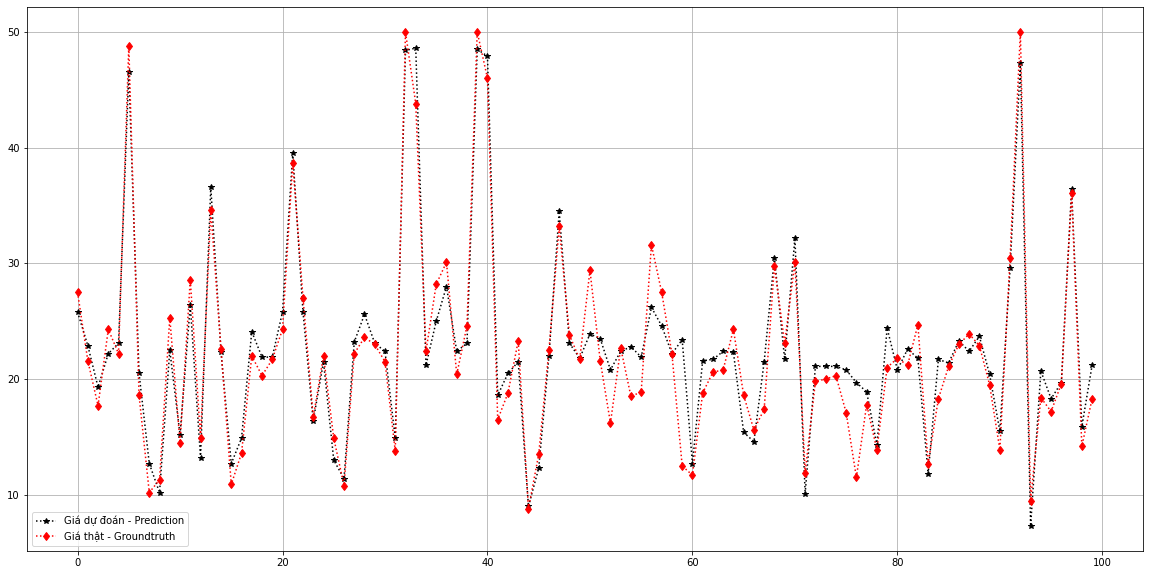

In [57]:
#Trực quan hóa kết quả
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_predict, marker='*',color ='black', linestyle=':', label='Giá dự đoán - Prediction')
plt.plot(y_groundtruth, marker='d', color='red',linestyle=':', label='Giá thật - Groundtruth')
plt.grid()
plt.legend()

In [56]:
#Xác định mẫu dự đoán chênh lệch giữa giá thực và giá predict lớn nhất:
from sklearn.metrics import max_error
max_error(y_groundtruth, y_predict)

10.899999999999999

## 1) Sai số tuyệt đối trung bình (MAE – Mean Absolute Error)
---
Sai số tuyệt đối trung bình (MAE – Mean Absolute Error) nằm trong khoảng (0, +∞). MAE biểu thị biên độ trung bình của sai số mô hình nhưng không nói lên xu hướng lệch của giá trị dự đoán (predicted) và giá trị thực (Actual). Khi MAE = 0, các giá trị dự đoán hoàn toàn trùng khớp với các giá trị thực, khi đó mô hình được xem là “lý tưởng”
<img src = 'pic/mae.jpg' width='500px'>

In [58]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_groundtruth, y_predict)
print('Sai số  MAE = ', mae)

Sai số  MAE =  1.8419999999999996


## 2) Sai số bình phương trung bình (MSE)
---
Sai số bình phương trung bình (MSE) nằm trong khoảng (0, +∞), MSE phản ánh mức độ dao động giữa giá trị dự đoán với giá trị thực.
<img src = 'pic/mse.jpg' width='500px'>

In [59]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_groundtruth, y_predict)
print('Sai số MSE = ', mse)

Sai số MSE =  5.968999999999999


## 3) Sai số RMSE
---
Sai số bình phương trung bình quân phương (RMSE) là một trong những đại lượng cơ bản và thường được sử dụng phổ biến trong đánh giá độ tin cậy của mô hình hồi quy. Người ta thường hay sử dụng RMSE biểu thị độ lớn trung bình của sai số. Đặc biệt RMSE rất nhạy với những giá trị sai số lớn. Giống như MAE, RMSE không chỉ ra độ lệch giữa giá trị dự báo và giá trị thực. Giá trị của RMSE nằm trong khoảng (0,+ ∞)

<img src='pic/RMSE.png' width='500xp'>

In [60]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_groundtruth,
                          y_predict,
                          squared=False)
print('Sai số RMSE = ', rmse)

Sai số RMSE =  2.4431536996267753


## 4) Hệ số $R^2$
---
**R2: Đánh giá tỷ lệ giải thích của mô hình ước lượng, hệ số này nằm giữa 0 và 1, càng gần 1 tỷ lệ giải thích được của mô hình càng tốt.**

* Giá trị R bình phương dao động từ 0 đến 1. R bình phương càng gần 1 thì mô hình đã xây dựng càng phù hợp với bộ dữ liệu dùng chạy hồi quy. R bình phương càng gần 0 thì mô hình đã xây dựng càng kém phù hợp với bộ dữ liệu dùng chạy hồi quy. Trường hợp đặt biệt, phương trình hồi quy đơn biến (chỉ có 1 biến độc lập) thì R2 chính là bình phương của hệ số tương quan r giữa hai biến đó.

* Ý nghĩa R bình phương: Giả sử R bình phương là 0.60, thì mô hình hồi quy tuyến tính này phù hợp với tập dữ liệu ở mức 60%. Nói cách khác, 60% biến thiên của biến phụ thuộc được giải thích bởi các biến độc lập.( còn 40% còn lại ở đâu, dĩ nhiên là do sai số đo lường, do cách thu thập dữ liệu, do có thể có biến độc lập khác giải thích cho biến phụ thuộc mà chưa được được vào mô hình nghiên cứu…vv). Thông thường, ngưỡng của R2 phải trên 50%, vì như thế mô hình mới phù hợp. Tuy nhiên tùy vào dạng nghiên cứu, như các mô hình về tài chính, không phải tất cả các hệ số R2 đều bắc buộc phải thỏa mãn lớn hơn 50%.( do rất khó dể dự đoán giá vàng, giá cổ phiếu mà chỉ đơn thuần dựa vào các biến độc lập ví dụ GDP, ROA,ROE….)

<img src='pic/r2.jpg' >

In [62]:
from sklearn.metrics import r2_score
r2 = r2_score(y_groundtruth, y_predict)
print('Hệ số R^2 = ', r2)

Hệ số R^2 =  0.9232469051137197


## THỰC HÀNH 3.6
---
* Sinh viên xem lại bài thực hành 3.3 trong Chương 3 – phần 03 về bài toán hồi quy với tập dữ liệu Diabetes Dataset .
* Xây dựng mô hình hồi quy tuyến tính với tất các thuộc tính đầu vào (input). Xác định sai số MAE, MSE, RMSE và R2  trên tập Train và Test.


In [ ]:
#{Sinh viên viết code ở đây...}




